In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

------------------------------------------------------------------------------------------------------------------
$\textbf{6}$. Let’s say your football team is playing a series of 5 games against your opponent. Whoever wins more games (out of 5) wins the title. Let us say, your team might is more skilled and has 75% chances of winning. So, there is a 25% chance of losing it. What is the probability of your team winning the series? Is it 75% or is it something else?

#####  Answer:

My team has to win 3, 4 or 5 games in order to win the series. The results of the game are independent of each other, so the probabilty my team winning the series could be modeled using a bionomial distribution where,

the number of games, $n = 5$, 

the minimum number of wins required, $k=[3,4,5]$, 

the probability of winning a game, $p=0.75$,

So, the probabiltiy of my team winning the series, 

$Pr(k | n,p) = Pr(k = 3 | n=5,p=0.75) + Pr(k = 4 | n=5,p=0.75) + Pr(k = 5 | n=5,p=0.75)$

We know, $Pr(k | n,p) = {n \choose k} p^k (1-p)^{n-k}$

In [55]:
n = 5
K = [3,4,5]
p=0.75
Pr = []
for i,k in enumerate(K):
    Pr.append(comb(n, k) * p ** k * (1-p) ** (n-k))
    
print('The probabiltiy of my team winning the series: {}'.format(np.sum(Pr)))

The probabiltiy of my team winning the series: 0.896484375


------------------------------------------------------------------------------------------------------------------
$\textbf{10.}$ Suppose that the p.d.f. of a random variable X is: - 


a) What is the value of constant c?

b) Sketch the p.d.f. - Pr(X > 3/2) =? 

c) Suppose that the random variable X has a uniform distribution on interval [0, 1]. Random variable Y has a uniform distribution on the interval [4, 10]. X and Y are independent. 

d) Suppose a rectangle is to be constructed for which the lengths of two adjacent sides are X and Y. So, what is the expected value of the area of this rectangle? 

e) Suppose that X is a random variable. If E(X) = μ, Var(X) = σ^2 , then what is the value of E[X(X − 1)] =? 

#####  Answer:

a) Since $f(x)$ is the p.d.f, $\int f(x) = 1$. Also, $f(x) > 0$ only when $1 \leq x \leq 2$,

So, $\int_1 ^ 2 f(x) = 1$

=> $\int_1 ^ 2 cx^2 = 1 $

=> $c[\frac{x^3}{3}]_1^2 = 1$

=> $c . \frac{7}{3} = 1$

=> $c = \frac{3}{7}$

b) p.d.f sketch for Pr(X > 3/2)

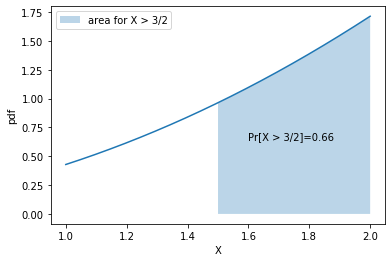

In [49]:
X = np.arange(1, 2, 0.0001)

pdf = (3/7) * X**2
plt.plot(X, pdf)

plt.fill_between(X[X > 1.5], pdf[X > 1.5], alpha=0.3, label='area for X > 3/2')

plt.text(1.6, 0.65, 'Pr[X > 3/2]=0.66')

plt.ylabel('pdf')
plt.xlabel('X')
plt.legend()
plt.show()

e) Let $f_x(X)$ be the p.d.f of $X$

Then, $Var(X) = E[(X - E[X])^2] = \int_{-\infty}^{+\infty} (X-\mu)^2 f_x(X)dx$

= $\int_{-\infty}^{+\infty}(X^2 - 2 \mu X + \mu^2)f_x(X)dx$ 

= $\int_{-\infty}^{+\infty} X^2f_x(X)dx - 2 \mu \int_{-\infty}^{+\infty} X f_x(X)dx + \mu^2 \int_{-\infty}^{+\infty} f_x(X)dx$

Since, $E[X] = \mu = \int_{-\infty}^{+\infty} Xf_x(X)dx$ and $\int_{-\infty}^{+\infty} f_x(X)dx = 1$,

Then, $Var(X) = E[X^2] - 2 \mu \times \mu + \mu^2$

=> $\sigma^2 = E[X^2] - \mu^2$   (Given $Var(X) = \sigma^2$)

=> $E[X^2] = \sigma^2 + \mu^2$

Now, $E[X(X-1)] = E[X^2 - X] = E[X^2] - E[X]$

= $\sigma^2 + \mu^2 - \mu$ (Ans)